In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep=";")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df=df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
y = df['quality']
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [7]:
X = df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# 6. 모델 학습 및 예측
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

y_preds = {}
scores = {}

for name, model in models.items():
    if name in ["KNN", "Logistic Regression"]:  # 스케일링된 데이터 사용
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    y_preds[name] = y_pred
    scores[name] = accuracy_score(y_test, y_pred)
    print(f"{name} 정확도: {scores[name]:.4f}")


KNN 정확도: 0.5265
Decision Tree 정확도: 0.5316
Random Forest 정확도: 0.6796
Logistic Regression 정확도: 0.5490


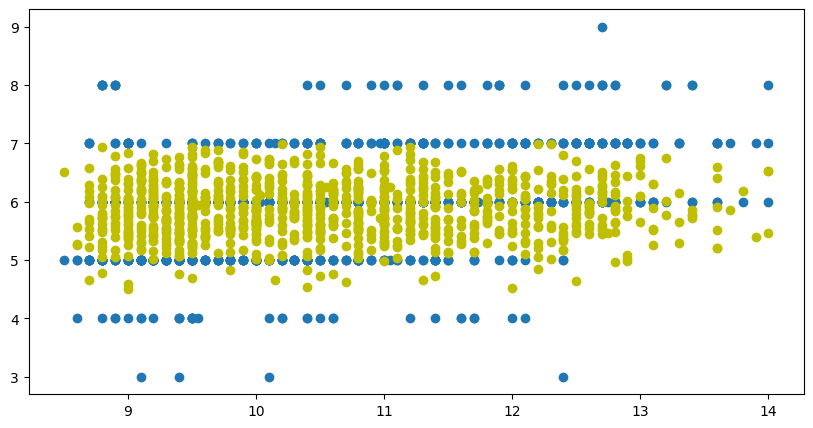

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X_test['alcohol'], y_test, label='y_test')
plt.scatter(X_test['alcohol'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.3830980612244898


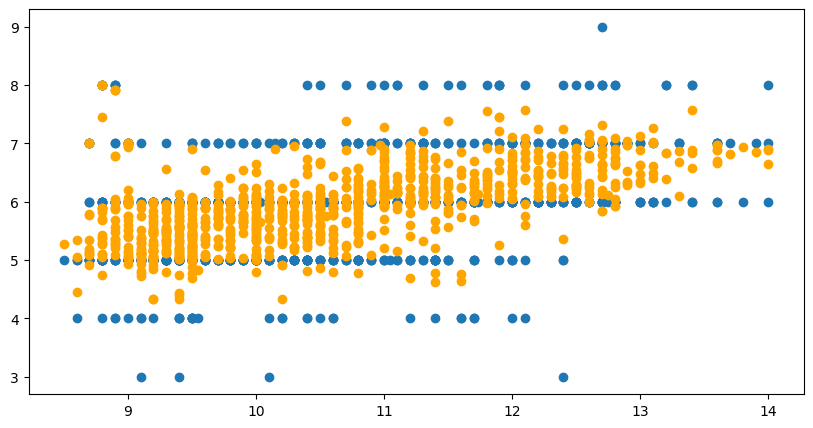

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['alcohol'], y_test, label='y_test')
plt.scatter(X_test['alcohol'], ry_preds, c='orange', label='ry_preds')

plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.6622448979591836


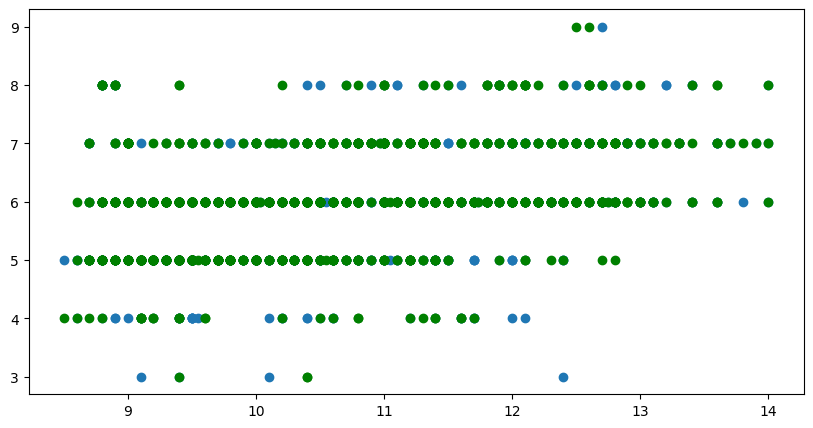

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['alcohol'], y_test, label='y_test')
plt.scatter(X_test['alcohol'], dy_preds, c='g', label='dy_preds')
plt.show()

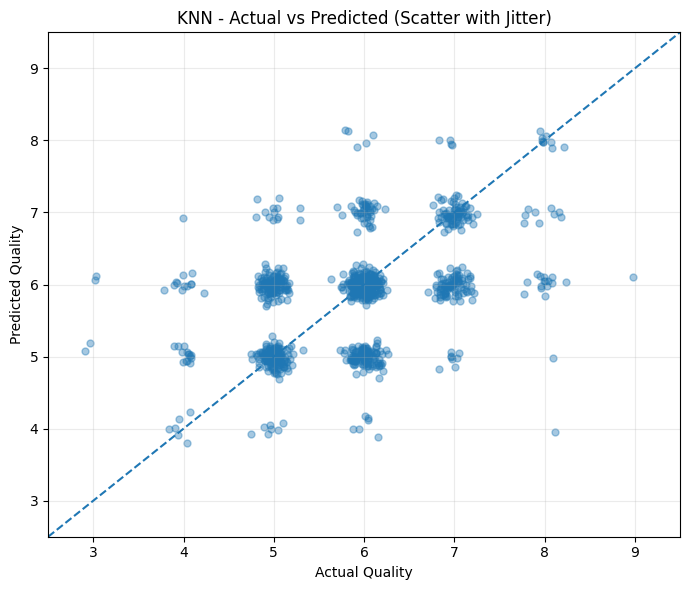

In [37]:

y_true = y_test.to_numpy() if hasattr(y_test, "to_numpy") else np.array(y_test)
y_pred = y_pred_knn

rng = np.random.default_rng(42)
jitter_strength = 0.10
x = y_true + rng.normal(0, jitter_strength, size=len(y_true))
y = y_pred + rng.normal(0, jitter_strength, size=len(y_pred))

plt.figure(figsize=(7, 6))
plt.scatter(x, y, alpha=0.4, s=25)

min_c = min(y_true.min(), y_pred.min()) - 0.5
max_c = max(y_true.max(), y_pred.max()) + 0.5
plt.plot([min_c, max_c], [min_c, max_c], linestyle="--")

classes = sorted(np.unique(np.concatenate([y_true, y_pred])))
plt.xticks(classes)
plt.yticks(classes)

plt.xlim(min_c, max_c)
plt.ylim(min_c, max_c)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("KNN - Actual vs Predicted (Scatter with Jitter)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


In [31]:
X = df.drop("quality", axis=1)
y = df["quality"]

model = LinearRegression()
model.fit(X, y)

print("절편:", model.intercept_)
print("기울기(각 feature별):")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")


절편: 150.19284248121528
기울기(각 feature별):
fixed acidity: 0.06551996135475305
volatile acidity: -1.8631770921609137
citric acid: 0.022090200679816308
residual sugar: 0.08148280263769919
chlorides: -0.24727653669074925
free sulfur dioxide: 0.00373276519233684
total sulfur dioxide: -0.00028574741871545406
density: -150.28418060049725
pH: 0.6863437418226751
sulphates: 0.6314764727092783
alcohol: 0.1934756972048691


alcohol → quality 선형회귀: y = 0.3135 * x + 2.5820


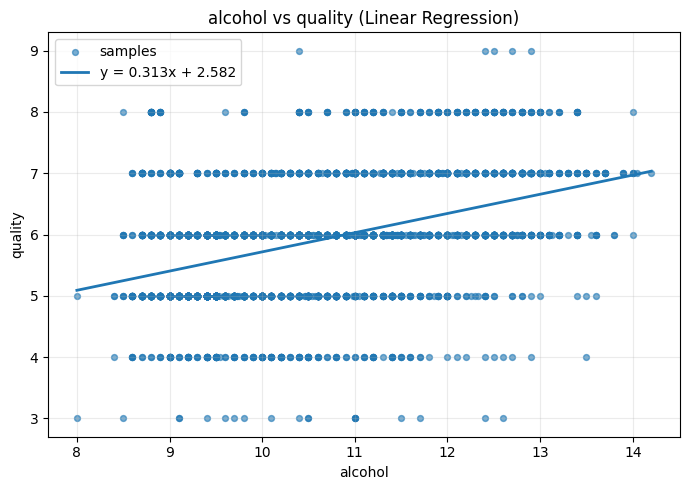

In [36]:


feat = "alcohol"
X1 = df[[feat]].values
y  = df["quality"].values

lin = LinearRegression()
lin.fit(X1, y)

slope = lin.coef_[0]
intercept = lin.intercept_
print(f"{feat} → quality 선형회귀: y = {slope:.4f} * x + {intercept:.4f}")

x_min, x_max = X1.min(), X1.max()
x_line = np.linspace(x_min, x_max, 200).reshape(-1, 1)
y_line = lin.predict(x_line)

plt.figure(figsize=(7,5))
plt.scatter(X1, y, s=18, alpha=0.6, label="samples")
plt.plot(x_line, y_line, linewidth=2.0, label=f"y = {slope:.3f}x + {intercept:.3f}")

plt.title(f"{feat} vs quality (Linear Regression)")
plt.xlabel(feat)
plt.ylabel("quality")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()
